In [93]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.optimize import curve_fit
%matplotlib inline

def vsffit(lag,lna,p):
    return (lna+p*lag)

ddir = '/run/media/chira/INTENSO/backup/data_backup/juan/strucfunc/vsfhr04/'

cloud = ['M4','M3','M3']
time  = ['0012','0035','0040']
color = ['red','green','blue']
title = ['decaying turbulence','SN shocked','gravitationally collapsing']
xlim  = [0.6,41]
ylim  = [4e-2,7e1]
posx  = [5,11.5,3]

ms = 15
lw = 5

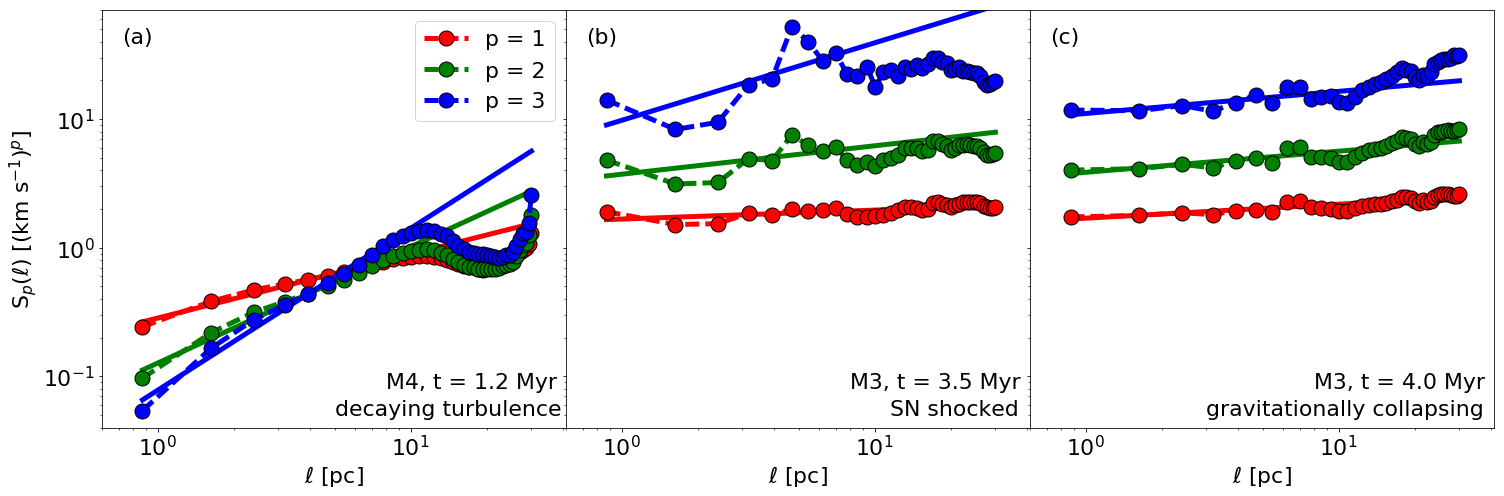

In [101]:
plt.rcParams['font.size'] = 22
fig,ax = plt.subplots(ncols=3,sharex=True,sharey=True,figsize=(21,7))


for ex in range(3):
    ifile = glob(ddir+'vel_struc_func_%s_%s.dat' % (cloud[ex],time[ex]))[0]
    lag,s1,s2,s3 = np.array([]),np.array([]),np.array([]),np.array([])
    lag,s1,s2,s3 = np.loadtxt(ifile,skiprows=2,usecols=(0,1,2,3),unpack=True)
    
    for p in range(1,4):
        if(p==1): vsf = s1
        if(p==2): vsf = s2
        if(p==3): vsf = s3
        
        h = np.where(lag <= 8.)[0]
        popt, pcov = curve_fit(vsffit,np.log10(lag[h]),np.log10(vsf[h]))
        ax[ex].plot(lag,10.**vsffit(np.log10(lag),*popt),ls='-',color=color[p-1],ms=ms,lw=lw,markeredgecolor='black')
        
        ax[ex].plot(lag,vsf,marker='o',ls='--',label=('p = %i' % p),color=color[p-1],ms=ms,lw=lw,markeredgecolor='black')
        
        
    ax[ex].text(8,8e-2,('%s, t = %3.1f Myr' % (cloud[ex],0.1*float(time[ex]))))
    ax[ex].text(posx[ex],5e-2,('%s' % title[ex]))
    if(ex==0): pic = '(a)'
    if(ex==1): pic = '(b)'
    if(ex==2): pic = '(c)'
    ax[ex].text(xlim[0]*1.2,ylim[1]*0.55,pic)
    ax[ex].set_xscale('log')
    ax[ex].set_yscale('log')
    ax[ex].set_xlim(xlim)
    ax[ex].set_ylim(ylim)
    ax[ex].set_xlabel('$\ell$ [pc]')
    if(ex == 0): 
        ax[ex].set_ylabel('S$_p(\ell)$ [(km s$^{-1}$)$^p$]')
        ax[ex].legend(loc=0)
    
fig.tight_layout(pad=0.5)
fig.subplots_adjust(wspace=0)
fig.savefig('vsf_example.pdf')